# 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 1. 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


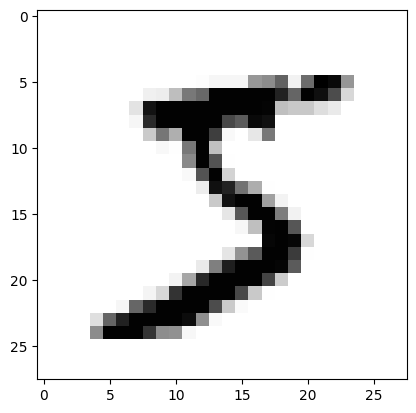

In [4]:
import matplotlib.pyplot as plt

# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap="Greys")
plt.show()

In [5]:
import sys

# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype("float64") / 255

In [7]:
# 클래스 값을 확인해 봅니다.
print("class : %d" % (y_train[0]))

class : 5


In [8]:
from tensorflow.keras.utils import to_categorical

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

# 모델 실행 환경을 설정합니다.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 최적화를 위한 설정 구간입니다.
modelpath = "./data/model/MNIST_MLP.keras"
checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True
)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [11]:
# 모델을 실행합니다.
history = model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=30,
    batch_size=200,
    verbose=0,
    callbacks=[early_stopping_callback, checkpointer],
)

# 테스트 정확도를 출력합니다.
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18906, saving model to ./data/model/MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18906 to 0.13660, saving model to ./data/model/MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13660 to 0.11513, saving model to ./data/model/MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11513 to 0.10035, saving model to ./data/model/MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10035 to 0.09087, saving model to ./data/model/MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09087 to 0.09060, saving model to ./data/model/MNIST_MLP.keras

Epoch 7: val_loss improved from 0.09060 to 0.08352, saving model to ./data/model/MNIST_MLP.keras

Epoch 8: val_loss improved from 0.08352 to 0.07987, saving model to ./data/model/MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.07987

Epoch 10: val_loss did not improve from 0.07987

Epoch 11: val_loss did not improve from 0.07987

Epoch 12: val_loss did not improve from 0.07987

Epoch 13: val_loss did n

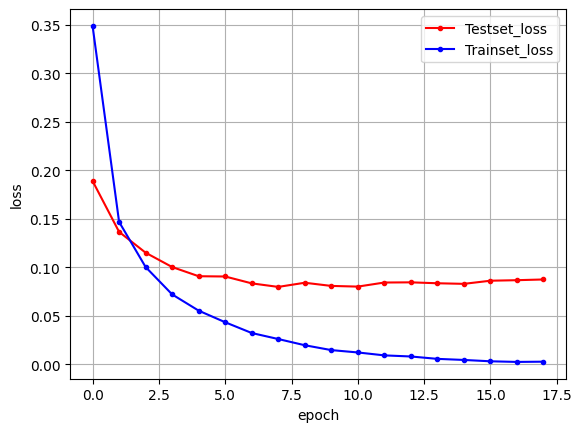

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## 3. 컨볼루션 신경망(CNN)

- 컨볼루션 신경망(Convolutional Neural Network, CNN): 이미지 인식 분야에서 강력한 성능을 보이는 딥러닝 모델
    - 이미지 특징 추출을 위해 커널(슬라이딩 윈도)을 도입
    - 케라스에서 컨볼루션 층을 추가하는 함수는 `Conv2D()`
        - 함수의 인자로 커널의 갯수, 커널의 크기((행, 열), `kernel_size`), 입력층의 크기((행, 열, 색상 또는 흑백), `input_shape`), 사용할 활성화 함수(`activation`)

## 4. 맥스 풀링, 드롭아웃, 플래튼

- 풀링(pooling): 컨볼루션 층의 결과가 크고 복잡할 때 이를 축소하는 과정, 서프 샘플링(sub sampling)이라고도 함
    - 맥스 풀링(max pooling): 정해진 구역 안에서 최대값을 뽑아내는 기법
    - 평균 풀링(average pooling): 정해진 구역 안에서 평균값을 뽑아내는 기법
    - 케라스의 `MaxPooling2D()` 함수 사용
        - `pool_size` 인자는 (행, 열) 형태의 풀링 창 크기를 정의
- 드롭아웃(drop out): 은닉층에 배치된 노드 중 일부를 임의로 꺼 과적합을 방지
    - 케라스의 `Dropout` 사용
- 플래튼(flatten): 컨볼루션 층이나 맥스 풀링 같은 2차원 배열에 대한 층의 결과를 1차원 배열에 대한 층으로 사용하기 위해 배열의 차원을 바꿈
    - 케라스의 `Flatten` 사용

## 5. 컨볼루션 신경망 실행하기

In [13]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# 모델 실행 옵션을 설정합니다.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# 모델 최적화를 위한 설정 구간입니다.
modelpath = "./data/model/MNIST_CNN.keras"
checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True
)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [16]:
# 모델을 실행합니다.
history = model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=30,
    batch_size=200,
    verbose=0,
    callbacks=[early_stopping_callback, checkpointer],
)

# 테스트 정확도를 출력합니다.
print("\nTest Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08009, saving model to ./data/model/MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08009 to 0.05875, saving model to ./data/model/MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05875 to 0.05481, saving model to ./data/model/MNIST_CNN.keras

Epoch 4: val_loss improved from 0.05481 to 0.04507, saving model to ./data/model/MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04507 to 0.04507, saving model to ./data/model/MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04507 to 0.04114, saving model to ./data/model/MNIST_CNN.keras

Epoch 7: val_loss improved from 0.04114 to 0.03953, saving model to ./data/model/MNIST_CNN.keras

Epoch 8: val_loss did not improve from 0.03953

Epoch 9: val_loss improved from 0.03953 to 0.03796, saving model to ./data/model/MNIST_CNN.keras

Epoch 10: val_loss did not improve from 0.03796

Epoch 11: val_loss did not improve from 0.03796

Epoch 12: val_loss did not improve from 0.03796

Epoch 13: val_loss did n

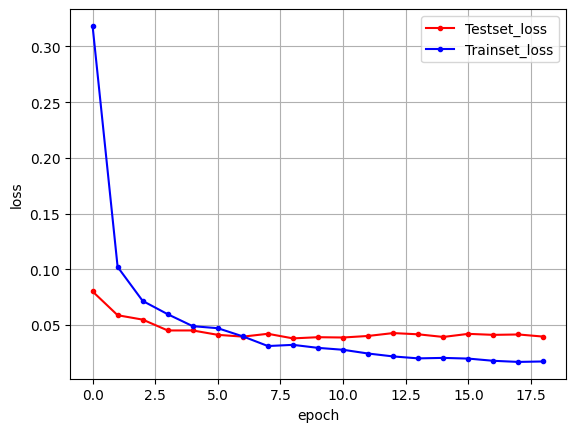

In [17]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()